## 决策树
1. 决策树处理分类任务——垃圾邮件分类
2. 决策树处理回归任务——Advertising广告预测
3. 实现决策树

### 决策树处理分类任务——垃圾邮件分类

1.	使用sklearn.tree.DecisionTreeClassifier完成spam比赛结果预测问题
2.	计算最大深度为10时，十折交叉验证的精度(accuracy)，查准率(precision)，查全率(recall)，F1值
3.	绘制最大深度从1到10的决策树十折交叉验证精度的变化图

#### 读取数据

In [1]:
import numpy as np
spambase = np.loadtxt('../data/spambase/spambase.data', delimiter = ",")
print(spambase.shape)

(4601, 58)


In [5]:
spamx = spambase[:, :57]
spamy = spambase[:, 57]
print(spamy.shape)
print(spamx.shape)

(4601,)
(4601, 57)


#### 导入模型

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

####  训练与预测
计算最大深度为10的决策树，在使用数据spamx，标记spamy下，十折交叉验证的精度，查准率，查全率和F1值

In [7]:
model = DecisionTreeClassifier(max_depth = 10) # 参数max_depth决定了决策树的最大深度

predicted = cross_val_predict(model, spamx, spamy, cv=10)
print("acc",accuracy_score(spamy, predicted))
print("recall_score", recall_score(spamy, predicted))
print("f1_score", f1_score(spamy, predicted))
print("precision_score", precision_score(spamy, predicted))


acc 0.911323625298848
recall_score 0.8676227247655819
f1_score 0.8851997749015194
precision_score 0.903503733486502


###### 双击此处填写下面的表格

最大深度为10：  

精度 | 查准率 | 查全率 | F1
0.911323625298848 | 0.903503733486502 | 0.8676227247655819 | 0.8851997749015194

#### 改变最大深度，绘制决策树的精度变换图
绘制最大深度从1到10，决策树十折交叉验证精度的变化图

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# YOUR CODE HERE
def train_depth_decision_tree(x, y):
    acc_ls = []
    for i in range(1, 11):
        model = DecisionTreeClassifier(max_depth=i)
        y_hat = cross_val_predict(model, x, y, cv=10)
        acc_ls.append(accuracy_score(y, y_hat))
    plt.title("max_depth from 1 to 10")
    x_lim = [i for i in range(1, 11)]
    plt.plot(x_lim, acc_ls)
    plt.ylabel("acc")
    plt.xlabel("max_depth")
    plt.xticks(x_lim)
    plt.show()


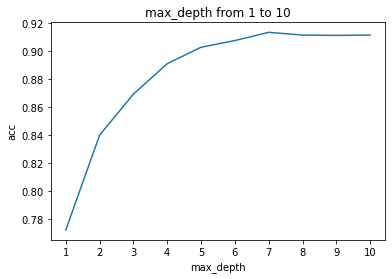

In [15]:
train_depth_decision_tree(spamx, spamy)

#### （选做）通过调整参数，得到一个泛化能力最好的模型
查看决策树文档，通过调整决策树的参数，得到一个最好的模型

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

并在下方给出参数的设定与其泛化性能指标

使用的GridSearchCV，自动调参

In [19]:
from sklearn.model_selection import GridSearchCV # 网格搜索
from sklearn.model_selection import StratifiedKFold #交叉验证时保证训练集测试集中每一类样本均衡
# YOUR CODE HERE
param = {'criterion':['gini'],'max_depth':[i for i in range(5, 20, 1)],'min_samples_leaf':[1,2,3,5,10],'min_impurity_decrease':[i for i in np.arange(0.1, 1, 0.1)]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=10)
grid.fit(spamx, spamy)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
                         'min_impurity_decrease': [0.1, 0.2,
                                                   0.30000000000000004, 0.4,
                                                   0.5, 0.6, 0.7000000000000001,
                                                   0.8, 0.9],
                         'min_samples_leaf': [1, 2, 3, 5, 10]})

In [27]:
print('best classifier', grid.best_params_)
print('best score', grid.best_score_)

best classifier {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 1}
best score 0.7720140526266152


###### 双击此处填写参数设置与性能指标的结果

参数设置：  min_samples_leaf':  , 'max_depth':   , 'criterion':   , 'min_samples_split':   , 'max_features':  


性能指标得分：

精度:  
查准率:  
查全率:  
f1值:  

### 决策树处理回归任务——Advertising广告预测

实验内容
1.	使用sklearn.tree.DecisionTreeRegressor完成Advertising广告预测
2.	计算最大深度为10的决策树，训练集上十折交叉验证的MAE和RMSE
3.	绘制最大深度从1到30，决策树在训练集和测试集上MAE的变化曲线
4.  选择一个合理的树的最大深度，并给出理由

#### 读取数据

In [28]:
import pandas as pd
data = pd.read_csv('../data/advertising/advertising.csv')
# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [31]:
features = data.columns.tolist()
target = 'Sales'
features.remove(target)

In [36]:
# YOUR CODE HERE

x_adviser = data[features]
y_adviser = data['Sales']

In [38]:
print(x_adviser.shape)
print(y_adviser.shape)

(200, 3)
(200,)


In [39]:
model_adviser = DecisionTreeRegressor(max_depth=10)
y_hat = cross_val_predict(model_adviser, x_adviser, y_adviser, cv=10)
print('mae', mean_absolute_error(y_adviser, y_hat))
print('rmse', np.sqrt(mean_squared_error(y_adviser, y_hat)))

mae 1.20525
rmse 1.6523233032948215


###### 双击此处编辑
最大深度为10，全量特征的决策树，十折交叉验证指标

MAE|RMSE
1.20525 |  1.6523233032948215

#### 改变最大深度，绘制决策树的精度变换图
绘制最大深度从1到30，决策树训练集和测试集MAE的变化图

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.style.use("fivethirtyeight")

In [52]:
# YOUR CODE HERE
def train_depth_decision_tree_adviser(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6)
    mae_train_ls = []
    mae_test_ls = []
    for i in range(1, 31):
        model = DecisionTreeRegressor(max_depth=i)
        # y_hat = cross_val_predict(model, x, y, cv=10)
        y_hat = model.fit(x_train, y_train).predict(x_train)
        mae_train_ls.append(mean_absolute_error(y_train, y_hat))
        y_hat = model.predict(x_test)
        mae_test_ls.append(mean_absolute_error(y_test, y_hat))
    plt.figure(figsize= (10,10))
    plt.title("max_depth from 1 to 30")
    x_lim = [i for i in range(1, 31)]
    plt.plot(x_lim, mae_train_ls, label='mae_train')
    plt.plot(x_lim, mae_test_ls, label='mae_test')
    plt.ylabel("mae")
    plt.xlabel("max_depth")
    plt.legend()
    plt.xticks(x_lim)
    plt.show()

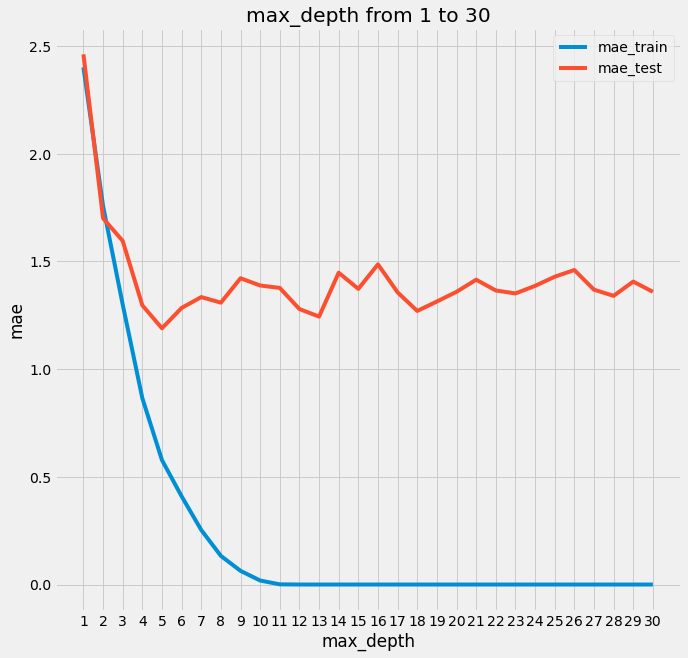

In [53]:
train_depth_decision_tree_adviser(x_adviser, y_adviser)

#### 请你选择一个合理的树的最大深度，并给出理由
 max_depth = 5
 因为这时泛化误差最小

### 实现决策树—贷款安全预测
实验内容：  
使用LendingClub Safe Loans数据集：
1. 实现信息增益、信息增益率、基尼指数三种划分标准
2. 使用给定的训练集完成三种决策树的训练过程
3. 计算三种决策树在最大深度为10时在训练集和测试集上的精度，查准率，查全率，F1值

#### 读取数据

In [77]:
# 导入类库
import pandas as pd
import numpy as np
import json
# 导入数据
loans = pd.read_csv('../data/lendingclub/lending-club-data.csv', low_memory=False)

In [78]:
loans['bad_loans']

0         0
1         1
2         0
3         0
4         0
         ..
122602    1
122603    0
122604    1
122605    1
122606    0
Name: bad_loans, Length: 122607, dtype: int64

In [79]:
# 对数据进行预处理，将safe_loans作为标记
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
del loans['bad_loans']

我们只使用grade, term, home_ownership, emp_length这四列作为特征，safe_loans作为标记，只保留loans中的这五列

In [80]:
features = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home_ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]
target = 'safe_loans'
loans = loans[features + [target]]

In [81]:
loans.head()

,grade,term,home_ownership,emp_length,safe_loans
0,B,36 months,RENT,10+ years,1
1,C,60 months,RENT,< 1 year,-1
2,C,36 months,RENT,10+ years,1
3,C,36 months,RENT,10+ years,1
4,A,36 months,RENT,3 years,1


In [82]:
# 划分数据集
from sklearn.utils import shuffle
loans = shuffle(loans, random_state = 34)

split_line = int(len(loans) * 0.6)
train_data = loans.iloc[: split_line]
test_data = loans.iloc[split_line:]

#### 特征预处理

可以看到所有的特征都是离散类型的特征，需要对数据进行预处理，使用one-hot编码对其进行处理。

one-hot编码的思想就是将离散特征变成向量，假设特征$A$有三种取值$\{a, b, c\}$，这三种取值等价，如果我们使用1,2,3三个数字表示这三种取值，那么在计算时就会产生偏差，有一些涉及距离度量的算法会认为，2和1离得近，3和1离得远，但这三个值应该是等价的，这种表示方法会造成模型在判断上出现偏差。解决方案就是使用一个三维向量表示他们，用$[1, 0, 0]$表示a，$[0, 1, 0]$表示b，$[0, 0, 1]$表示c，这样三个向量之间的距离就都是相等的了，任意两个向量在欧式空间的距离都是$\sqrt{2}$。这就是one-hot编码是思想。

In [83]:
def one_hot_encoding(data, features_categorical):
    '''
    Parameter
    ----------
    data: pd.DataFrame
    
    features_categorical: list(str)
    '''
    
    # 对所有的离散特征遍历
    for cat in features_categorical:
        
        # 对这列进行one-hot编码，前缀为这个变量名
        one_encoding = pd.get_dummies(data[cat], prefix = cat)
        
        # 将生成的one-hot编码与之前的dataframe拼接起来
        data = pd.concat([data, one_encoding],axis=1)
        
        # 删除掉原始的这列离散特征
        del data[cat]
    
    return data

首先对训练集生成one-hot向量，然后对测试集生成one-hot向量，这里需要注意的是，如果训练集中，特征 𝐴 的取值为 {𝑎,𝑏,𝑐} ，这样我们生成的特征就有三列，分别为 𝐴_𝑎 ,  𝐴_𝑏 ,  𝐴_𝑐 ，然后我们使用这个训练集训练模型，模型就就会考虑这三个特征，在测试集中如果有一个样本的特征 𝐴 的值为 𝑑 ，那它的 𝐴_𝑎 ， 𝐴_𝑏 ， 𝐴_𝑐 就都为0，我们不去考虑 𝐴_𝑑 ，因为这个特征在训练模型的时候是不存在的。

In [84]:
train_data = one_hot_encoding(train_data, features)
train_data.head()

,safe_loans,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months,...,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
84320,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
121308,-1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
58376,-1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
66430,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
65344,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
one_hot_features = train_data.columns.tolist()
one_hot_features.remove(target)
one_hot_features

['grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'term_ 36 months',
 'term_ 60 months',
 'home_ownership_MORTGAGE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'emp_length_1 year',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_< 1 year']

接下来是对测试集进行one_hot编码，但只要保留出现在one_hot_features中的特征即可·

In [86]:
test_data_tmp = one_hot_encoding(test_data, features)

In [87]:
# 创建一个空的DataFrame
test_data = pd.DataFrame(columns = train_data.columns)
for feature in train_data.columns:
    # 如果训练集中当前特征在test_data_tmp中出现了，将其复制到test_data中
    if feature in test_data_tmp.columns:
        test_data[feature] = test_data_tmp[feature].copy()
    else:
        # 否则就用全为0的列去替代
        test_data[feature] = np.zeros(test_data_tmp.shape[0], dtype = 'uint8')

所以为什么不划分数据集前就转one_hot 为什么不用pandas自带的one_hot

In [88]:
test_data.head()

,safe_loans,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months,...,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
37225,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
101585,-1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
31865,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
97692,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
88181,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
train_data.shape

(73564, 25)

In [90]:
test_data.shape

(49043, 25)

**处理完后，所有的特征都是0和1，标记是1和-1**，以上就是数据预处理流程

#### 实现3种特征划分准则

 - 决策树中有很多常用的特征划分方法，比如信息增益、信息增益率、基尼指数
 - 我们需要实现一个函数，它的作用是，给定决策树的某个结点内的所有样本的标记，让它计算出对应划分指标的值是多少
 - 接下来我们会实现上述三种划分指标
 - **这里我们约定，将所有特征取值为0的样本，划分到左子树，特征取值为1的样本，划分到右子树**

##### 信息增益
信息熵：
$$
\mathrm{Ent}(D) = - \sum^{\vert \mathcal{Y} \vert}_{k = 1} p_k \mathrm{log}_2 p_k
$$

信息增益：
$$
\mathrm{Gain}(D, a) = \mathrm{Ent}(D) - \sum^{V}_{v=1} \frac{\vert D^v \vert}{\vert D \vert} \mathrm{Ent}(D^v)
$$

计算信息熵时约定：若$p = 0$，则$p \log_2p = 0$

**下面的函数需要填写两个部分**

In [93]:
def information_entropy(labels_in_node):
    '''
    求当前结点的信息熵
    
    Parameter
    ----------
    labels_in_node: np.ndarray, 如[-1, 1, -1, 1, 1]
    
    Returns
    ----------
    float: information entropy
    '''
    # 统计样本总个数
    num_of_samples = labels_in_node.shape[0]
    
    if num_of_samples == 0:
        return 0
    
    # 统计出标记为1的个数
    num_of_positive = len(labels_in_node[labels_in_node == 1])
    
    # 统计出标记为-1的个数
    # YOUR CODE HERE
    
    # 统计正例的概率
    prob_positive = num_of_positive / num_of_samples
    
    # 统计负例的概率
    # YOUR CODE HERE
    num_of_negative = len(labels_in_node[labels_in_node == -1])
    prob_negative = num_of_negative / num_of_samples

    if prob_positive == 0:
        positive_part = 0
    else:
        positive_part = prob_positive * np.log2(prob_positive)
    
    if prob_negative == 0:
        negative_part = 0
    else:
        negative_part = prob_negative * np.log2(prob_negative)
    
    return - ( positive_part + negative_part )

In [94]:
# 信息熵测试样例1
example_labels = np.array([-1, -1, 1, 1, 1])
print(information_entropy(example_labels)) # 0.97095

0.9709505944546686


接下来完成计算所有特征的信息增益的函数  
**需要填写三个部分**

In [95]:
def compute_information_gains(data, features, target, annotate = False):
    '''
    计算所有特征的信息增益
    
    Parameter
    ----------
        data: pd.DataFrame，传入的样本，带有特征和标记的dataframe
        
        features: list(str)，特征名组成的list
        
        target: str, 标记(label)的名字
        
        annotate, boolean，是否打印所有特征的信息增益值，默认为False
        
    Returns
    ----------
        information_gains: dict, key: str, 特征名
                                 value: float，信息增益
    '''
    
    # 我们将每个特征划分的信息增益值存储在一个dict中
    # 键是特征名，值是信息增益值
    information_gains = dict()
    
    # 对所有的特征进行遍历，使用信息增益对每个特征进行计算
    for feature in features:
        
        # 左子树保证所有的样本的这个特征取值为0
        left_split_target = data[data[feature] == 0][target]
        
        # 右子树保证所有的样本的这个特征取值为1
        # YOUR CODE HERE
        right_split_target = data[data[feature] == 1][target]
            
        # 计算左子树的信息熵
        left_entropy = information_entropy(left_split_target)
        
        # 计算左子树的权重
        left_weight = len(left_split_target) / (len(left_split_target) + len(right_split_target))

        # 计算右子树的信息熵
        # YOUR CODE HERE
        # YOUR CODE HERE
        right_entropy = information_entropy(right_split_target)
        # 计算右子树的权重
        # YOUR CODE HERE
        right_weight = len(right_split_target) / (len(right_split_target) + len(left_split_target))
        
        # 计算当前结点的信息熵
        current_entropy = information_entropy(data[target])
            
        # 计算使用当前特征划分的信息增益
        gain = current_entropy - ( right_weight * right_entropy + left_weight * left_entropy)
        # YOUR CODE HERE
        
        # 将特征名与增益值以键值对的形式存储在information_gains中
        information_gains[feature] = gain
        
        if annotate:
            print(" ", feature, gain)
            
    return information_gains

In [96]:
# 信息增益测试样例1
print(compute_information_gains(train_data, one_hot_features, target)['grade_A']) # 0.01759

0.017591980178887745


#####  信息增益率
信息增益率：

$$
\mathrm{Gain\_ratio}(D, a) = \frac{\mathrm{Gain}(D, a)}{\mathrm{IV}(a)}
$$

其中

$$
\mathrm{IV}(a) = - \sum^V_{v=1} \frac{\vert D^v \vert}{\vert D \vert} \log_2 \frac{\vert D^v \vert}{\vert D \vert}
$$

In [97]:
def compute_information_gain_ratios(data, features, target, annotate = False):
    '''
    计算所有特征的信息增益率并保存起来
    
    Parameter
    ----------
    data: pd.DataFrame, 带有特征和标记的数据
    
    features: list(str)，特征名组成的list
    
    target: str， 特征的名字
    
    annotate: boolean, default False，是否打印注释
    
    Returns
    ----------
    gain_ratios: dict, key: str, 特征名
                       value: float，信息增益率
    '''
    
    gain_ratios = dict()
    
    # 对所有的特征进行遍历，使用当前的划分方法对每个特征进行计算
    for feature in features:
        
        # 左子树保证所有的样本的这个特征取值为0
        left_split_target = data[data[feature] == 0][target]
        
        # 右子树保证所有的样本的这个特征取值为1
        # YOUR CODE HERE
        right_split_target = data[data[feature] == 1][target]
            
        # 计算左子树的信息熵
        left_entropy = information_entropy(left_split_target)
        
        # 计算左子树的权重
        left_weight = len(left_split_target) / (len(left_split_target) + len(right_split_target))

        # 计算右子树的信息熵
        # YOUR CODE HERE                                       # YOUR CODE HERE
        right_entropy = information_entropy(right_split_target)
        
        # 计算右子树的权重
        # YOUR CODE HERE                 # YOUR CODE HERE
        right_weight = len(right_split_target) / (len(right_split_target)+len(left_split_target))
        # 计算当前结点的信息熵
        current_entropy = information_entropy(data[target])
        
        # 计算当前结点的信息增益
        
        # gain =  current_entropy - ( right_weight * right_entropy + left_weight * left_entropy)
        gain = compute_information_gains(data, [feature], target)[feature]
        # param of feature is a list, return' is dict .
        # YOUR CODE HERE             # YOUR CODE HERE
        
        # 计算IV公式中，当前特征为0的值
        if left_weight == 0:
            left_IV = 0
        else:
            # YOUR CODE HERE                                    # YOUR CODE HERE
            left_IV = left_weight* np.log2(left_weight)
        # 计算IV公式中，当前特征为1的值
        if right_weight == 0:
            right_IV = 0
        else:
            # YOUR CODE HERE                              # YOUR CODE HERE
            right_IV = right_weight * np.log2(right_weight)
        # IV 等于所有子树IV之和的相反数
        IV = - (left_IV + right_IV)
            
        # 计算使用当前特征划分的信息增益率
        # 这里为了防止IV是0，导致除法得到np.inf（无穷），在分母加了一个很小的小数
        gain_ratio = gain / (IV + np.finfo(np.longdouble).eps)
        
        # 信息增益率的存储
        gain_ratios[feature] = gain_ratio
        
        if annotate:
            print(" ", feature, gain_ratio)
            
    return gain_ratios

In [89]:
# 信息增益率测试样例1
print(compute_information_gain_ratios(train_data, one_hot_features, target)['grade_A']) # 0.02573

0.025734780668006156


##### 基尼指数
数据集$D$的基尼值：

$$
\begin{aligned}
\mathrm{Gini}(D) & = \sum^{\vert \mathcal{Y} \vert}_{k=1} \sum_{k' \neq k} p_k p_{k'}\\
& = 1 - \sum^{\vert \mathcal{Y} \vert}_{k=1} p^2_k.
\end{aligned}
$$

属性$a$的基尼指数：

$$
\mathrm{Gini\_index}(D, a) = \sum^V_{v = 1} \frac{\vert D^v \vert}{\vert D \vert} \mathrm{Gini}(D^v)
$$

In [98]:
def gini(labels_in_node):
    '''
    计算一个结点内样本的基尼指数
    
    Paramters
    ----------
    label_in_data: np.ndarray, 样本的标记，如[-1, -1, 1, 1, 1]
    
    Returns
    ---------
    gini: float，基尼指数
    '''
    
    # 统计样本总个数
    num_of_samples = labels_in_node.shape[0]
    
    if num_of_samples == 0:
        return 0
    
    # 统计出1的个数
    num_of_positive = len(labels_in_node[labels_in_node == 1])
    
    # 统计出-1的个数
    # YOUR CODE HERE           # YOUR CODE HERE
    num_of_negative = len(labels_in_node[labels_in_node == -1])
    # 统计正例的概率
    prob_positive = num_of_positive / num_of_samples
    
    # 统计负例的概率
    # YOUR CODE HERE                  # YOUR CODE HERE
    prob_negative = num_of_negative / num_of_samples
    # 计算基尼值
    gini = 1 - prob_negative **2 - prob_positive**2
    # YOUR CODE HERE                  # YOUR CODE HERE
    
    return gini

In [91]:
# 基尼值测试样例1
example_labels = np.array([-1, -1, 1, 1, 1])
print(gini(example_labels)) # 0.48

0.48


然后计算所有特征的基尼指数

In [99]:
def compute_gini_indices(data, features, target, annotate = False):
    '''
    计算使用各个特征进行划分时，各特征的基尼指数
    
    Parameter
    ----------
    data: pd.DataFrame, 带有特征和标记的数据
    
    features: list(str)，特征名组成的list
    
    target: str， 特征的名字
    
    annotate: boolean, default False，是否打印注释
    
    Returns
    ----------
    gini_indices: dict, key: str, 特征名
                       value: float，基尼指数
    '''
    
    gini_indices = dict()
    # 对所有的特征进行遍历，使用当前的划分方法对每个特征进行计算
    for feature in features:
        # 左子树保证所有的样本的这个特征取值为0
        left_split_target = data[data[feature] == 0][target]
        
        # 右子树保证所有的样本的这个特征取值为1
        right_split_target =  data[data[feature] == 1][target]
            
        # 计算左子树的基尼值
        left_gini = gini(left_split_target)
        
        # 计算左子树的权重
        left_weight = len(left_split_target) / (len(left_split_target) + len(right_split_target))

        # 计算右子树的基尼值
        right_gini = gini(right_split_target)
       # YOUR CODE HERE                                  # YOUR CODE HERE
        
        # 计算右子树的权重
        # YOUR CODE HERE             # YOUR CODE HERE
        right_weight = len(right_split_target) / (len(left_split_target) + len(right_split_target))
        # 计算当前结点的基尼指数
        gini_index = right_weight * right_gini + left_weight* left_gini
        # YOUR CODE HERE               # YOUR CODE HERE
        
        # 存储
        gini_indices[feature] = gini_index
        
        if annotate:
            print(" ", feature, gini_index)
            
    return gini_indices

In [95]:
# 基尼指数测试样例1
print(compute_gini_indices(train_data, one_hot_features, target)['grade_A']) # 0.30095

0.3009520964964362


#### 完成最优特征的选择

到此，我们完成了三种划分策略的实现，接下来就是完成获取最优特征的函数  
**这里需要填写三个部分**

In [100]:
def best_splitting_feature(data, features, target, criterion = 'gini', annotate = False):
    '''
    给定划分方法和数据，找到最优的划分特征
    
    Parameters
    ----------
    data: pd.DataFrame, 带有特征和标记的数据
    
    features: list(str)，特征名组成的list
    
    target: str， 特征的名字
    
    criterion: str, 使用哪种指标，三种选项: 'information_gain', 'gain_ratio', 'gini'
    
    annotate: boolean, default False，是否打印注释
    
    Returns
    ----------
    best_feature: str, 最佳的划分特征的名字
    
    '''
    if criterion == 'information_gain':
        if annotate:
            print('using information gain')
        
        # 得到当前所有特征的信息增益
        information_gains:dict = compute_information_gains(data, features, target, annotate)
    
        # information_gains是一个dict类型的对象
        # 根据这些特征和他们的信息增益，找到最佳的划分特征
        best_feature = max(information_gains, key=information_gains.get)
        # YOUR CODE HERE
        
        return best_feature

    elif criterion == 'gain_ratio':
        if annotate:
            print('using information gain ratio')
        
        # 得到当前所有特征的信息增益率
        gain_ratios:dict = compute_information_gain_ratios(data, features, target, annotate)
    
        # 根据这些特征和他们的信息增益率，找到最佳的划分特征
        best_feature = max(gain_ratios, key=gain_ratios.get)
        # YOUR CODE HERE

        return best_feature
    
    elif criterion == 'gini':
        if annotate:
            print('using gini')
        
        # 得到当前所有特征的基尼指数
        gini_indices = compute_gini_indices(data, features, target, annotate)
        
        # 根据这些特征和他们的基尼指数，找到最佳的划分特征
        best_feature = min(gini_indices, key=gini_indices.get)
         # YOUR CODE HERE

        return best_feature
    else:
        raise Exception("传入的criterion不合规!", criterion)

#### 判断结点内样本的类别是否为同一类

In [101]:
def intermediate_node_num_mistakes(labels_in_node):
    '''
    求树的结点中，样本数少的那个类的样本有多少，比如输入是[1, 1, -1, -1, 1]，返回2
    
    Parameter
    ----------
    labels_in_node: np.ndarray, pd.Series
    
    Returns
    ----------
    int：个数
    
    '''
    # 如果传入的array为空，返回0
    if len(labels_in_node) == 0:
        return 0
    
    # 统计1的个数
    num_of_one = len(labels_in_node[labels_in_node==1])
    # YOUR CODE HERE
    
    # 统计-1的个数
    num_of_minus_one = len(labels_in_node[labels_in_node==-1])
    # YOUR CODE HERE
    
    return num_of_one if num_of_minus_one > num_of_one else num_of_minus_one

In [103]:
# 测试样例1
print(intermediate_node_num_mistakes(np.array([1, 1, -1, -1, -1]))) # 2

2


#### 创建叶子结点

In [102]:
def create_leaf(target_values):
    '''
    计算出当前叶子结点的标记是什么，并且将叶子结点信息保存在一个dict中
    
    Parameter:
    ----------
    target_values: pd.Series, 当前叶子结点内样本的标记

    Returns:
    ----------
    leaf: dict，表示一个叶结点，
            leaf['splitting_features'], None，叶结点不需要划分特征
            leaf['left'], None，叶结点没有左子树
            leaf['right'], None，叶结点没有右子树
            leaf['is_leaf'], True, 是否是叶子结点
            leaf['prediction'], int, 表示该叶子结点的预测值
    '''
    # 创建叶子结点
    leaf = {'splitting_feature' : None,
            'left' : None,
            'right' : None,
            'is_leaf': True}
   
    # 数结点内-1和+1的个数
    num_ones = len(target_values[target_values == +1])
    num_minus_ones = len(target_values[target_values == -1])    

    # 叶子结点的标记使用少数服从多数的原则，为样本数多的那类的标记，保存在 leaf['prediction']
    if num_ones > num_minus_ones:
        leaf['prediction'] = 1
    else:
        leaf['prediction'] = -1

    # 返回叶子结点
    return leaf

#### 递归地创建决策树
递归的创建决策树  
递归算法终止的三个条件：
1. 如果结点内所有的样本的标记都相同，该结点就不需要再继续划分，直接做叶子结点即可
2. 如果结点所有的特征都已经在之前使用过了，在当前结点无剩余特征可供划分样本，该结点直接做叶子结点
3. 如果当前结点的深度已经达到了我们限制的树的最大深度，直接做叶子结点

In [103]:
def decision_tree_create(data, features, target, criterion = 'gini', current_depth = 0, max_depth = 10, annotate = False):
    '''
    Parameter:
    ----------
    data: pd.DataFrame, 数据

    features: iterable, 特征组成的可迭代对象，比如一个list

    target: str, 标记的名字

    criterion: 'str', 特征划分方法，只支持三种：'information_gain', 'gain_ratio', 'gini'

    current_depth: int, 当前深度，递归的时候需要记录

    max_depth: int, 树的最大深度，我们设定的树的最大深度，达到最大深度需要终止递归

    Returns:
    ----------
    dict, dict['is_leaf']          : False, 当前顶点不是叶子结点
          dict['prediction']       : None, 不是叶子结点就没有预测值
          dict['splitting_feature']: splitting_feature, 当前结点是使用哪个特征进行划分的
          dict['left']             : dict
          dict['right']            : dict
    '''
    
    if criterion not in ['information_gain', 'gain_ratio', 'gini']:
        raise Exception("传入的criterion不合规!", criterion)
    
    # 复制一份特征，存储起来，每使用一个特征进行划分，我们就删除一个
    remaining_features = features[:]
    
    # 取出标记值
    target_values = data[target]
    if annotate:
        print("-" * 50)
        print("Subtree, depth = %s (%s data points)." % (current_depth, len(target_values)))

        # 终止条件1
        # 如果当前结点内所有样本同属一类，即这个结点中，各类别样本数最小的那个等于0
        # 使用前面写的intermediate_node_num_mistakes来完成这个判断
    if intermediate_node_num_mistakes(target_values) == 0:
        if annotate:
            print("Stopping condition 1 reached.")
        return create_leaf(target_values)   # 创建叶子结点

    # 终止条件2
    # 如果已经没有剩余的特征可供分割，即remaining_features为空

    if remaining_features.__len__()==0:  # YOUR CODE HERE :                                            # YOUR CODE HERE
        if annotate:
            print("Stopping condition 2 reached.")
        return create_leaf(target_values)   # 创建叶子结点

    # 终止条件3
    # 如果已经到达了我们要求的最大深度，即当前深度达到了最大深度

    if max_depth==current_depth: # YOUR CODE HERE:                                      # YOUR CODE HERE
        if annotate:
            print("Reached maximum depth. Stopping for now.")
        return create_leaf(target_values)   # 创建叶子结点

        # 找到最优划分特征
        # 使用best_splitting_feature这个函数
    
    splitting_feature = best_splitting_feature(data, remaining_features, target, criterion) # YOUR CODE HERE
    
    # 使用我们找到的最优特征将数据划分成两份
    # 左子树的数据
    left_split = data[data[splitting_feature] == 0]
    
    # 右子树的数据
    # YOUR CODE HERE
    right_split = data[data[splitting_feature] == 1]
    # 现在已经完成划分，我们要从剩余特征中删除掉当前这个特征
    remaining_features.remove(splitting_feature)
    
    # 打印当前划分使用的特征，打印左子树样本个数，右子树样本个数
    if annotate:
        print("Split on feature %s. (%s, %s)" % (\
                      splitting_feature, len(left_split), len(right_split)))
    
    # 如果使用当前的特征，将所有的样本都划分到一棵子树中，那么就直接将这棵子树变成叶子结点
    # 判断左子树是不是“完美”的
    if len(left_split) == len(data):
        if(annotate):
            print("Creating leaf node.")
        return create_leaf(left_split[target])

    # 判断右子树是不是“完美”的
    # YOUR CODE HERE
    if len(right_split) == len(data):
        if(annotate):
            print("Creating right node.")
        return create_leaf(right_split[target])

    # 递归地创建左子树
    left_tree = decision_tree_create(left_split, remaining_features, target, criterion, current_depth + 1, max_depth, annotate)
    
    # 递归地创建右子树
    
    right_tree = decision_tree_create(right_split, remaining_features, target, criterion, current_depth + 1, max_depth, annotate)                         # YOUR CODE HERE

    # 返回树的非叶子结点
    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

In [137]:
my_decision_tree = decision_tree_create(train_data, one_hot_features, target, 'gini', max_depth = 6, annotate = False)

--------------------------------------------------
Subtree, depth = 0 (73564 data points).
Split on feature term_ 36 months. (14831, 58733)
--------------------------------------------------
Subtree, depth = 1 (14831 data points).
Split on feature grade_F. (13003, 1828)
--------------------------------------------------
Subtree, depth = 2 (13003 data points).
Split on feature grade_E. (9818, 3185)
--------------------------------------------------
Subtree, depth = 3 (9818 data points).
Split on feature home_ownership_RENT. (6796, 3022)
--------------------------------------------------
Subtree, depth = 4 (6796 data points).
Split on feature grade_G. (6507, 289)
--------------------------------------------------
Subtree, depth = 5 (6507 data points).
Split on feature grade_D. (4368, 2139)
--------------------------------------------------
Subtree, depth = 6 (4368 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------
Subtree, depth = 6 

In [104]:
my_decision_tree = decision_tree_create(train_data, one_hot_features, target, 'gini', max_depth = 6, annotate = False)

#### 预测
接下来我们需要完成预测函数

In [105]:
def classify(tree, x, annotate = False):
    '''
    递归的进行预测，一次只能预测一个样本
    
    Parameters
    ----------
    tree: dict
    
    x: pd.Series，待预测的样本
    
    annotate： boolean, 是否显示注释
    
    Returns
    ----------
    返回预测的标记
    '''
    if tree['is_leaf']:
        if annotate:
            print ("At leaf, predicting %s" % tree['prediction'])
        return tree['prediction']
    else:
        split_feature_value = x[tree['splitting_feature']]
        if annotate:
             print ("Split on %s = %s" % (tree['splitting_feature'], split_feature_value))
        if split_feature_value == 0:
            return classify(tree['left'], x, annotate)
        else:
            return classify(tree['right'], x, annotate)

In [106]:
test_sample = test_data.iloc[0]
print(test_sample)

safe_loans                 1
grade_A                    0
grade_B                    0
grade_C                    0
grade_D                    0
grade_E                    1
grade_F                    0
grade_G                    0
term_ 36 months            1
term_ 60 months            0
home_ownership_MORTGAGE    1
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership_RENT        0
emp_length_1 year          0
emp_length_10+ years       0
emp_length_2 years         1
emp_length_3 years         0
emp_length_4 years         0
emp_length_5 years         0
emp_length_6 years         0
emp_length_7 years         0
emp_length_8 years         0
emp_length_9 years         0
emp_length_< 1 year        0
Name: 37225, dtype: int64


In [140]:
print('Predicted class: %s ' % classify(my_decision_tree, test_sample))

Predicted class: 1 


In [141]:
print('True class: %s ' % (test_sample['safe_loans']))

True class: 1 


#### 在测试集上对我们的模型进行评估

In [144]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

先来编写一个批量预测的函数，传入的是整个测试集那样的pd.DataFrame，这个函数返回一个np.ndarray，存储模型的预测结果  

In [107]:
def predict(tree, data):
    '''
    按行遍历data，对每个样本进行预测，将值存在prediction中，最后返回np.ndarray
    
    Parameter
    ----------
    tree: dict, 模型
    
    data: pd.DataFrame, 数据
    
    Returns
    ----------
    predictions：np.ndarray, 模型对这些样本的预测结果
    '''
    predictions = np.zeros(len(data)) # 长度和data一样
    
    # YOUR CODE HERE
    for i in range(len(data)):
        test_sample = data.iloc[i]
        result  = classify(tree, test_sample)
        predictions[i] = result
    return predictions

#### 请你计算使用三种不同评价指标得到模型的四项指标的值，填写在下方表格内

**树的最大深度为6**

In [167]:
def train_test_tree(annotate_=False):
    criterions = ['gini', 'information_gain','gain_ratio']
    for criterion in criterions:
        model = decision_tree_create(train_data, one_hot_features, target, criterion, max_depth = 6, annotate = annotate_)
        y_hat = predict(model, test_data)
        print(criterion)
        print('acc', accuracy_score(test_data[target], y_hat))
        print('precision_score', precision_score(test_data[target],y_hat))
        print('recall_score', recall_score(test_data[target], y_hat))
        print('f1_score', f1_score(test_data[target], y_hat))
        print()

In [168]:
train_test_tree()
#方便显示 把 生成决策树的过程打印关闭

gini
acc 0.8117366392757376
precision_score 0.8128399100388468
recall_score 0.9980168193799422
f1_score 0.8959603357935657

information_gain
acc 0.8122056154802928
precision_score 0.8122387390142941
recall_score 0.9999497928956947
f1_score 0.8963724740087312

gain_ratio
acc 0.8117774198152642
precision_score 0.8124897892501225
recall_score 0.9987699259445212
f1_score 0.8960508090942874



树的最大深度为6  

###### 双击此处编写

| 划分标准 | 精度 | 查准率 | 查全率 | F1 |
|:----: |
| gini | 0.811736 | 0.812839 | 0.998016 | 0.895960 |
| information_gain | 0.812205 | 0.812238 | 0.999949 | 0.896372 |
| gain_ratio | 0.811777 | 0.812489 | 0.998769 | 0.896050 |






#### 使用Echarts绘制决策树
我们可以使用echarts绘制出我们训练的决策树，这时候可以利用pyecharts这个库 pyecharts
pyecharts可以与jupyter notebook无缝衔接，直接在notebook中绘制图表。 提醒：pyecharts还未支持jupyter lab

pyecharts使用：https://pyecharts.org/#/zh-cn/intro

如何安装？

pip 安装：$ pip(3) install pyecharts

（anaconda可在anaconda prompt中进行安装）

源码安装：

$ git clone https://github.com/pyecharts/pyecharts.git

$ cd pyecharts

$ pip install -r requirements.txt

$ python setup.py install

（或者执行 python install.py）

In [170]:
!pip install pyecharts

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [91]:
from pyecharts.charts import Tree
# Tree.add(decision_tree_create(train_data, one_hot_features, target, 'gini', max_depth = 6, ))

In [113]:
def generate_echarts_data(tree):

    # 当前顶点的dict
    value = dict()

    # 如果传入的tree已经是叶子结点了
    if tree['is_leaf'] == True:

        # 它的value就设置为预测的标记
        value['value'] = tree['prediction']

        # 它的名字就叫"label: 标记"
        value['name'] = 'label: %s'%(tree['prediction'])

        # 直接返回这个dict即可
        return value

    # 如果传入的tree不是叶子结点，名字就叫当前这个顶点的划分特征，子树是一个list
    # 分别增加左子树和右子树到children中
    value['name'] = tree['splitting_feature']
    value['children'] = [generate_echarts_data(tree['left']), generate_echarts_data(tree['right'])]
    return value


data1 = generate_echarts_data(my_decision_tree)

tree = Tree()
tree.add("",
         [data1],
         # tree_collapse_interval=5,
         pos_top="15%",
         pos_right="20%",
         symbol = 'rect',
         symbol_size = 20,
         )
tree.render()


'D:\\BJTU\\subject\\Junior First\\Machine Learning\\experience\\test3_1027\\render.html'

决策树照片（生成的是html文件）故直接显示图片
![图片alt](./决策树可视化.png "图片title")

## 集成学习

### 随机森林的应用——Advertising广告预测
1. 使用随机森林进行广告预测
2. 尝试不同的超参数设置下进行实验，记录结果
3. 对不同参数对结果的影响进行简要分析

In [2]:
import numpy as np
import pandas as pd

# 使用pandas读取csv数据
data = pd.read_csv('../data/advertising/advertising.csv')
# 打印前5行
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'
data = data[features + [target]]
data.shape

(200, 4)

In [4]:
from sklearn.model_selection import train_test_split
# 随机划分70%作为训练集，30%作为测试集
trainX, testX, trainY, testY = train_test_split(data.values[:,:-1], data.values[:,-1], test_size = 0.3, random_state = 32)

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
# 模型训练
# YOUR CODE HERE
model_random_forest = RandomForestRegressor()
model_random_forest.fit(trainX, trainY)

RandomForestRegressor()

In [7]:
# 评价指标的计算
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# YOUR CODE HERE
y_hat = model_random_forest.predict(testX)
print("mae", mean_absolute_error(testY, y_hat))
print('mse', mean_squared_error(testY, y_hat))

mae 1.1803333333333323
mse 2.366406699999997


In [14]:
import matplotlib.pyplot as plt

用图可以嘛 求求

n_estimators 1
mae 1.5333333333333328
mse 3.9249999999999976
n_estimators 2
mae 1.5049999999999997
mse 4.133916666666665
n_estimators 3
mae 1.336111111111111
mse 2.916574074074074
n_estimators 4
mae 1.2924999999999998
mse 2.823416666666666
n_estimators 5
mae 1.274333333333334
mse 2.7436866666666666
n_estimators 6
mae 1.2452777777777775
mse 2.682375
n_estimators 7
mae 1.333809523809524
mse 2.858557823129252
n_estimators 8
mae 1.162291666666667
mse 2.3693984374999997
n_estimators 9
mae 1.2885185185185188
mse 2.9730864197530873
n_estimators 10
mae 1.2676666666666667
mse 2.70865
n_estimators 11
mae 1.1983333333333333
mse 2.413954545454545
n_estimators 12
mae 1.1176388888888886
mse 2.2652465277777765
n_estimators 13
mae 1.2353846153846157
mse 2.6436390532544367
n_estimators 14
mae 1.256547619047619
mse 2.65278656462585
n_estimators 15
mae 1.1871111111111115
mse 2.475583703703703
n_estimators 16
mae 1.1956250000000002
mse 2.4502838541666674
n_estimators 17
mae 1.234509803921568
mse 2.6223806

Text(0.5, 1.0, 'n_estimator')

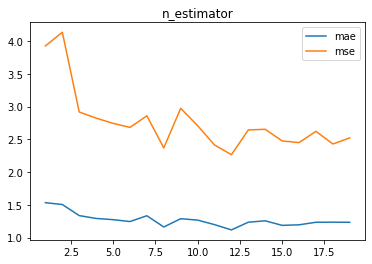

In [21]:
#尝试不同的超参数设置下的实验
# 大家自行查阅随机森林的参数，选取至少四种超参数的组会，绘制表格
mae_ls = []
mse_ls = []

for i in range(1, 20):
    model_random_forest1 = RandomForestRegressor(n_estimators=i)
    model_random_forest1.fit(trainX, trainY)
    y_hat = model_random_forest1.predict(testX)
    print("n_estimators", i)
    mae = mean_absolute_error(testY, y_hat)
    mse = mean_squared_error(testY, y_hat)
    print("mae", mae)
    print('mse', mse)
    mae_ls.append(mae)
    mse_ls.append(mse)
x_lim = np.array([i for i in range(1, 20, 1)])
plt.plot(x_lim, mae_ls, label='mae')
plt.plot(x_lim, mse_ls, label='mse')
plt.legend()
plt.title('n_estimator')

max_depth 1
mae 2.102663036671492
mse 7.42755267069207
max_depth 2
mae 1.8845074685873462
mse 5.016148355919985
max_depth 3
mae 1.5311900273709045
mse 3.5276092632537037
max_depth 4
mae 1.293517696031215
mse 2.760867275864113
max_depth 5
mae 1.277568283617597
mse 2.6528367962161905
max_depth 6
mae 1.2342490756062139
mse 2.5447696698030744
max_depth 7
mae 1.2173585333824657
mse 2.457630321090326
max_depth 8
mae 1.214036991411367
mse 2.519900990684449
max_depth 9
mae 1.1872618181818184
mse 2.4085449197212143
max_depth 10
mae 1.2098330291005284
mse 2.506070175443258
max_depth 11
mae 1.2148752777777763
mse 2.4558524427685153
max_depth 12
mae 1.175373333333333
mse 2.343203763592588
max_depth 13
mae 1.2373374999999998
mse 2.596449301041665
max_depth 14
mae 1.2042833333333334
mse 2.4306074166666667
max_depth 15
mae 1.2115999999999993
mse 2.4773050333333324
max_depth 16
mae 1.2091166666666675
mse 2.413547316666668
max_depth 17
mae 1.2342666666666673
mse 2.5226214666666658
max_depth 18
mae 1.20

Text(0.5, 1.0, 'max_depth')

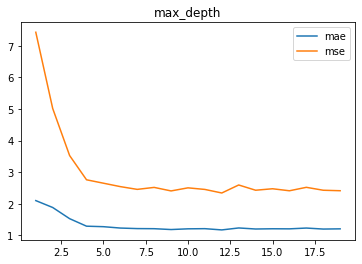

In [23]:
mae_ls = []
mse_ls = []

for i in range(1, 20):
    model_random_forest2 = RandomForestRegressor(max_depth=i)
    model_random_forest2.fit(trainX, trainY)
    y_hat = model_random_forest2.predict(testX)
    print("max_depth", i)
    mae = mean_absolute_error(testY, y_hat)
    mse = mean_squared_error(testY, y_hat)
    print("mae", mae)
    print('mse', mse)
    mae_ls.append(mae)
    mse_ls.append(mse)
x_lim = [i for i in range(1, 20)]
plt.plot(x_lim, mae_ls, label='mae')
plt.plot(x_lim, mse_ls, label='mse')
plt.legend()
plt.title('max_depth')

criterion squared_error
mae 1.1851500000000004
mse 2.4192117500000014
criterion absolute_error
mae 1.1900666666666668
mse 2.4454144999999983
criterion poisson
mae 1.4636166666666672
mse 3.590386350000001


Text(0.5, 1.0, 'criterions')

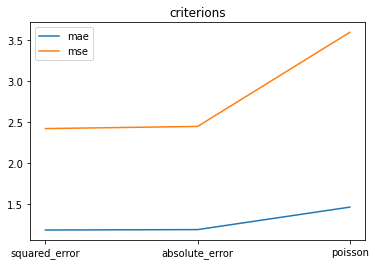

In [29]:
mae_ls = []
mse_ls = []

criterions = ['squared_error','absolute_error', 'poisson']
for i in criterions:
    model_random_forest3 = RandomForestRegressor(criterion=i)
    model_random_forest3.fit(trainX, trainY)
    y_hat = model_random_forest3.predict(testX)
    print("criterion", i)
    mae = mean_absolute_error(testY, y_hat)
    mse = mean_squared_error(testY, y_hat)
    print("mae", mae)
    print('mse', mse)
    mae_ls.append(mae)
    mse_ls.append(mse)
# x_lim = [i for i in range(1, 4)]

plt.plot(criterions, mae_ls, label='mae')
plt.plot(criterions, mse_ls, label='mse')
plt.legend()
plt.title('criterions')

In [ ]:
mae_ls = []
mse_ls = []

criterions = ['squared_error','absolute_error', 'poisson']
for i in criterions:
    model_random_forest3 = RandomForestRegressor(criterion=i)
    model_random_forest3.fit(trainX, trainY)
    y_hat = model_random_forest3.predict(testX)
    print("criterion", i)
    mae = mean_absolute_error(testY, y_hat)
    mse = mean_squared_error(testY, y_hat)
    print("mae", mae)
    print('mse', mse)
    mae_ls.append(mae)
    mse_ls.append(mse)
# x_lim = [i for i in range(1, 4)]

plt.plot(criterions, mae_ls, label='mae')
plt.plot(criterions, mse_ls, label='mse')
plt.legend()
plt.title('criterions')

max_feature sqrt
mae 1.521850000000001
mse 3.8897493833333314
max_feature log2
mae 1.4287000000000003
mse 3.678530566666664


Text(0.5, 1.0, 'max_features')

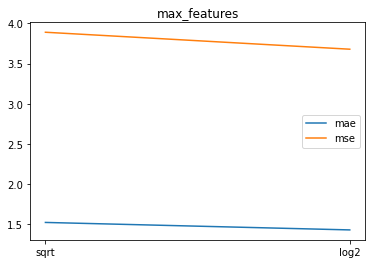

In [34]:
mae_ls = []
mse_ls = []

max_features =['sqrt', 'log2']
for i in max_features:
    model_random_forest4 = RandomForestRegressor(max_features=i)
    model_random_forest4.fit(trainX, trainY)
    y_hat = model_random_forest4.predict(testX)
    print("max_feature", i)
    mae = mean_absolute_error(testY, y_hat)
    mse = mean_squared_error(testY, y_hat)
    print("mae", mae)
    print('mse', mse)
    mae_ls.append(mae)
    mse_ls.append(mse)
# x_lim = [i for i in range(1, 4)]

plt.plot(max_features, mae_ls, label='mae')
plt.plot(max_features, mse_ls, label='mse')
plt.legend()
plt.title('max_features')

### 自行实现AdaBoost并完成肿瘤分类
实验内容
1. 加载sklearn中的肿瘤归类数据集
2. 自行选择基学习器（可以使用Scikit-learn现成的分类器）自己实现，使用不同的基学习器实现2种以上的AdaBoost
3. 运用Accuracy, Precision, Recall, F1四个指标进行对比评测，随机选择70%作为训练集，30%作为测试集，把结果绘制成表格
4. 与Scikit-learn 的AdaBoostClassifier得到的结果进行对比

In [35]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
#导入数据
feat,label = load_breast_cancer(return_X_y=True)
feat.shape

(569, 30)

In [38]:
# 划分数据集：70%训练集，30%测试集 （随机种子固定为32）
# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(feat, label, train_size=0.7)

#### 自行实现AdaBoost

In [76]:
import copy
class MyAdaBoostClassifier:
    def __init__(self, base_estimator, n_estimators=50, learning_rate=1.0, n_classes=2):
        '''
        base_estimator: 基分类器
        n_estimators： 
        learning_rate： 学习率
        n_classes：分类类数
        '''
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators 
        self.lr = learning_rate
        self.R = n_classes
        self.estimators = []
        self.alphas = []  # model_weight
        for m in range(n_estimators):
            self.estimators.append(copy.deepcopy(base_estimator))

    def fit(self, X, y):
        sample_weight = np.array([1/len(X) for i in range(len(X))])
        # print(sample_weight)
        #
        # YOUR CODE HERE  # 初始化样本权重为 1/N
        for i in range(self.n_estimators):
            model = self.estimators[i]
            # YOUR CODE HERE  # 训练弱学习器
            model.fit(X, y)
            y_pred = model.predict(X)

            error = np.sum(sample_weight* (y_pred != y))  
            alpha = self.lr * (np.log((1-error)/error) + np.log(self.R-1))  # 权重系数
            sample_weight *= np.exp(alpha*(y_pred!=y))  # 更新迭代样本权重
            sample_weight /= np.sum(sample_weight)  # 样本权重归一化
            self.alphas.append(alpha)
        return self
   
    def predict(self, X):  # 假定类别映射成 0,1,...
        y_pred = [] 
        for i in range(self.n_estimators):
            y_pred.append(self.estimators[i].predict_proba(X) )
        # 将预测类别概率与训练权重乘积作为集成预测类别概率    
        y_pred = np.average(np.asarray(y_pred), weights=np.array(self.alphas), axis=0 ) 
        y_pred = y_pred/np.array(self.alphas).sum()
        y_pred = np.argmax(y_pred, axis=1)
        return y_pred


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [50]:
# 选取基分类器1
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
model_adaboost = MyAdaBoostClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5))
model_adaboost.fit(x_train, y_train)
y_hat = model_adaboost.predict(x_test)
print('acc', accuracy_score(y_test, y_hat))
print('precision_score', precision_score(y_test, y_hat))
print('f1', f1_score(y_test, y_hat))
print('recall', recall_score(y_test, y_hat))

acc 0.9415204678362573
precision_score 0.9642857142857143
f1 0.9557522123893805
recall 0.9473684210526315


In [51]:
# 选取基分类器2
# YOUR CODE HERE
from sklearn.neural_network import MLPClassifier
model_adaboost1 = MyAdaBoostClassifier(base_estimator=MLPClassifier(max_iter=500))
model_adaboost1.fit(x_train, y_train)
y_hat = model_adaboost1.predict(x_test)
print('acc', accuracy_score(y_test, y_hat))
print('precision_score', precision_score(y_test, y_hat))
print('f1', f1_score(y_test, y_hat))
print('recall', recall_score(y_test, y_hat))

acc 0.9766081871345029
precision_score 0.9910714285714286
f1 0.9823008849557523
recall 0.9736842105263158


mlp yyds


In [75]:
# from sklearn.neighbors import KNeighborsClassifier
model_adaboost = MyAdaBoostClassifier(DecisionTreeClassifier())
model_adaboost.fit(x_train, y_train)
y_hat = model_adaboost.predict(x_test)
print('acc', accuracy_score(y_test, y_hat))
print('precision_score', precision_score(y_test, y_hat))
print('f1', f1_score(y_test, y_hat))
print('recall', recall_score(y_test, y_hat))

D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


acc 0.3333333333333333
precision_score 0.0
f1 0.0
recall 0.0


D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

#### 评价指标的计算

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

见上

###### 双击此处填写

| 基分类器|精度|查准率|查全率|F1 |
|:----:|:----:|:----:|:----:|
| knn n=5 | 0.94152 | 0.96428 | 0.94736 | 0.95575 |
| MLP | 0.97660 | 0.99107 | 0.97368 | 0.98230 |


#### 调用sklearn的模型实现AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
# YOUR CODE HERE
model_adaboost3 = AdaBoostClassifier(DecisionTreeClassifier())
model_adaboost3.fit(x_train, y_train)
y_hat = model_adaboost3.predict(x_test)
print('acc', accuracy_score(y_test, y_hat))
print('precision_score', precision_score(y_test, y_hat))
print('f1', f1_score(y_test, y_hat))
print('recall', recall_score(y_test, y_hat))

acc 0.9064327485380117
precision_score 0.9454545454545454
f1 0.9285714285714285
recall 0.9122807017543859


In [62]:
from sklearn.ensemble import AdaBoostClassifier
# YOUR CODE HERE
model_adaboost3 = AdaBoostClassifier(KNeighborsClassifier())
model_adaboost3.fit(x_train, y_train)
y_hat = model_adaboost3.predict(x_test)
print('acc', accuracy_score(y_test, y_hat))
print('precision_score', precision_score(y_test, y_hat))
print('f1', f1_score(y_test, y_hat))
print('recall', recall_score(y_test, y_hat))

ValueError: KNeighborsClassifier doesn't support sample_weight.

In [63]:
from sklearn.ensemble import AdaBoostClassifier
# YOUR CODE HERE
model_adaboost3 = AdaBoostClassifier(MLPClassifier())
model_adaboost3.fit(x_train, y_train)
y_hat = model_adaboost3.predict(x_test)
print('acc', accuracy_score(y_test, y_hat))
print('precision_score', precision_score(y_test, y_hat))
print('f1', f1_score(y_test, y_hat))
print('recall', recall_score(y_test, y_hat))

ValueError: MLPClassifier doesn't support sample_weight.

#### 自行实现与sklearn结果对比
1. 分析不同的基学习器的AdaBoost的表现差异和原因:
2. 分析自行实现与sklearn计算结果的差异

总体来说，不同基学习器模型的Adaboost表现是有差异的。其中MLP和kNN表现比决策树要好，这可能是和模型复杂度有关。MLP的参数比较多，效果会好一些。

sklearn的AdaBoost base estimator需要支持 sample_weight。这样，一开始选择的KNN和MLP就不能比较了，只能选择默认的决策树模
型进行比较。
其中，自行实现的初始化权重是1/N,这可能对模型造成一定的影响。同时，我们选取了KNN和MLP两个基分类器，他们的表现就很好，这说明我们自行实现的Adaboost代码是没有问题的。但是，KNN和MLP在sklearn实现的adaboost中没有办法使用，是因为他们没有实现sample weight 这样也说明了自己实现adaboost的灵活性。

